In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import constants
import math

In [2]:
df = pd.read_csv("Na_22.csv",sep=";",decimal=",",header=None)
df[1] = df[1]/max(df[1])
max(df[0])#Endpunktenergie

550.0

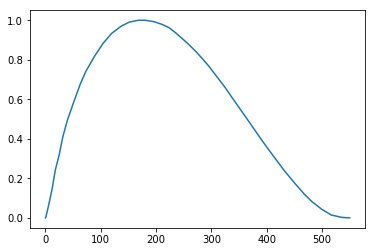

In [3]:
plt.plot(df[0],df[1])
plt.show()

In [4]:
lower_endpoint = min(df[0])
higher_endpoint = max(df[0])
uniform_vals = [random.uniform(lower_endpoint, higher_endpoint) for i in range(1000000)]
keeping_probability = np.interp(uniform_vals,df[0],df[1]) # 1-rejection_probability

resulting_vals = []
for energy_probability in zip(uniform_vals,keeping_probability):
       if random.random() < energy_probability[1]:
            resulting_vals.append(energy_probability[0])
        
        

In [5]:
len(resulting_vals)

570105

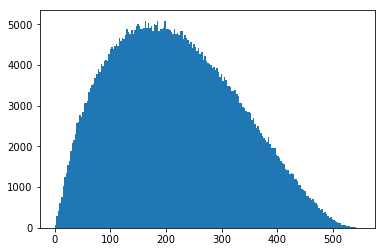

In [6]:
plt.hist(resulting_vals,bins=200)
plt.show()

In [7]:
# p = sqrt(E_kin*(E_kin+2m_0c^2)/c^2)
def momentum_components_from_energy(energy_in_kev):
    energy = energy_in_kev*1000*scipy.constants.e
    p = math.sqrt(energy*(energy+2*scipy.constants.m_e*scipy.constants.c**2)/scipy.constants.c**2)
    
    phi = random.uniform(0,2*scipy.constants.pi)
    costheta = random.uniform(-1,1)
    theta = math.acos( costheta )    
    
    x = p*math.sin( theta) * math.cos( phi )
    y = p*math.sin( theta) * math.sin( phi )
    z = p*math.cos( theta )
    
    return (energy,x,y,z)

def velocity_from_momentum(energy,x,y,z):
    mass = (energy/(scipy.constants.c**2))+scipy.constants.m_e
    velocity = (x/mass,y/mass,z/mass)
    for i in velocity:
        if abs(i)>scipy.constants.c:
            raise ValueError
    return velocity

velocity_from_momentum(*momentum_components_from_energy(random.random()*1000))

(-189253653.84420285, 77077556.51029293, -147165624.4582218)

In [8]:
velocity_list = [velocity_from_momentum(*momentum_components_from_energy(e)) for e in resulting_vals]

In [14]:
with open("Na-22-Spectrum.csv","w") as f:
    for (counter,velocity_tuple) in enumerate(velocity_list):
        f.write("{};{};{};{}\n".format(counter,velocity_tuple[0],velocity_tuple[1],velocity_tuple[2]))
    f.close()

In [15]:
sum(velocity_list[:][0])/len(velocity_list)

-247.72547356270445